In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
load_dir = '/content/drive/MyDrive/Pickle'

pickle_in = open(os.path.join(load_dir, "categories.pickle"), "rb")
categories = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_train.pickle"), "rb")
X_train = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_train.pickle"), "rb")
y_train = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_valid.pickle"), "rb")
X_valid = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_valid.pickle"), "rb")
y_valid = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_test.pickle"), "rb")
X_test = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_test.pickle"), "rb")
y_test = pickle.load(pickle_in)

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
#VGG16 for assignment 1 (final)
model = keras.Sequential([
    ## Input layer
    keras.Input(shape=(256, 256, 3)),

    ## First Block: Convolutional layers
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'), 
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),  
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)), 

    ## Second Block: Convolutional layers
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'), 
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),  
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  

    ## Third Block: Convolutional layers
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),  
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),  
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),  
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)), 

    ## Fourth Block: Convolutional layers
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),  
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),  
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  

    ## Fifth Block: Convolutional layers
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),  
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),  
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  

   
    layers.Flatten(),

    ## Fully connected layers 
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    ## Output layer 
    layers.Dense(4, activation='softmax')
])

# Model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │     134,221,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 161,014,596 (614.22 MB)

 Trainable params: 161,014,596 (614.22 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=5, restore_best_weights=True)

h = model.fit(x=X_train, y=y_train, batch_size=15, epochs=15, validation_data=(X_valid, y_valid), callbacks=[cb], verbose=1)

Epoch 1/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 82s 980ms/step - accuracy: 0.4458 - loss: 1.4416 - val_accuracy: 0.9323 - val_loss: 0.2241
Epoch 2/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 323ms/step - accuracy: 0.9574 - loss: 0.1044 - val_accuracy: 0.9948 - val_loss: 0.0411
Epoch 3/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 331ms/step - accuracy: 0.9969 - loss: 0.0256 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 4/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.9859 - loss: 0.0686 - val_accuracy: 0.9896 - val_loss: 0.0469
Epoch 5/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 305ms/step - accuracy: 0.9875 - loss: 0.0659 - val_accuracy: 1.0000 - val_loss: 6.8444e-04
Epoch 6/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 303ms/step - accuracy: 1.0000 - loss: 5.3920e-04 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 306ms/step - accuracy: 1.0000 - loss: 6.1654e-05 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - accuracy: 1.0000 - loss: 2.172

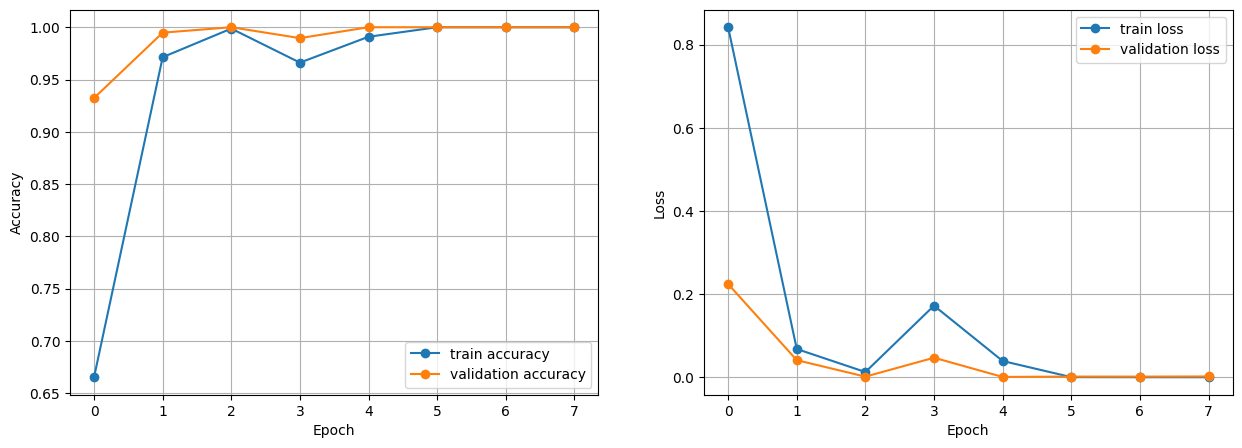

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 1.0000 - loss: 1.1525e-04

Test Accuracy: 1.0

Test Loss: 0.00014369563723448664


In [23]:
predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step


In [24]:
model_path = '/content/drive/MyDrive/Model'

model.save(os.path.join(model_path, "cnn.h5"))

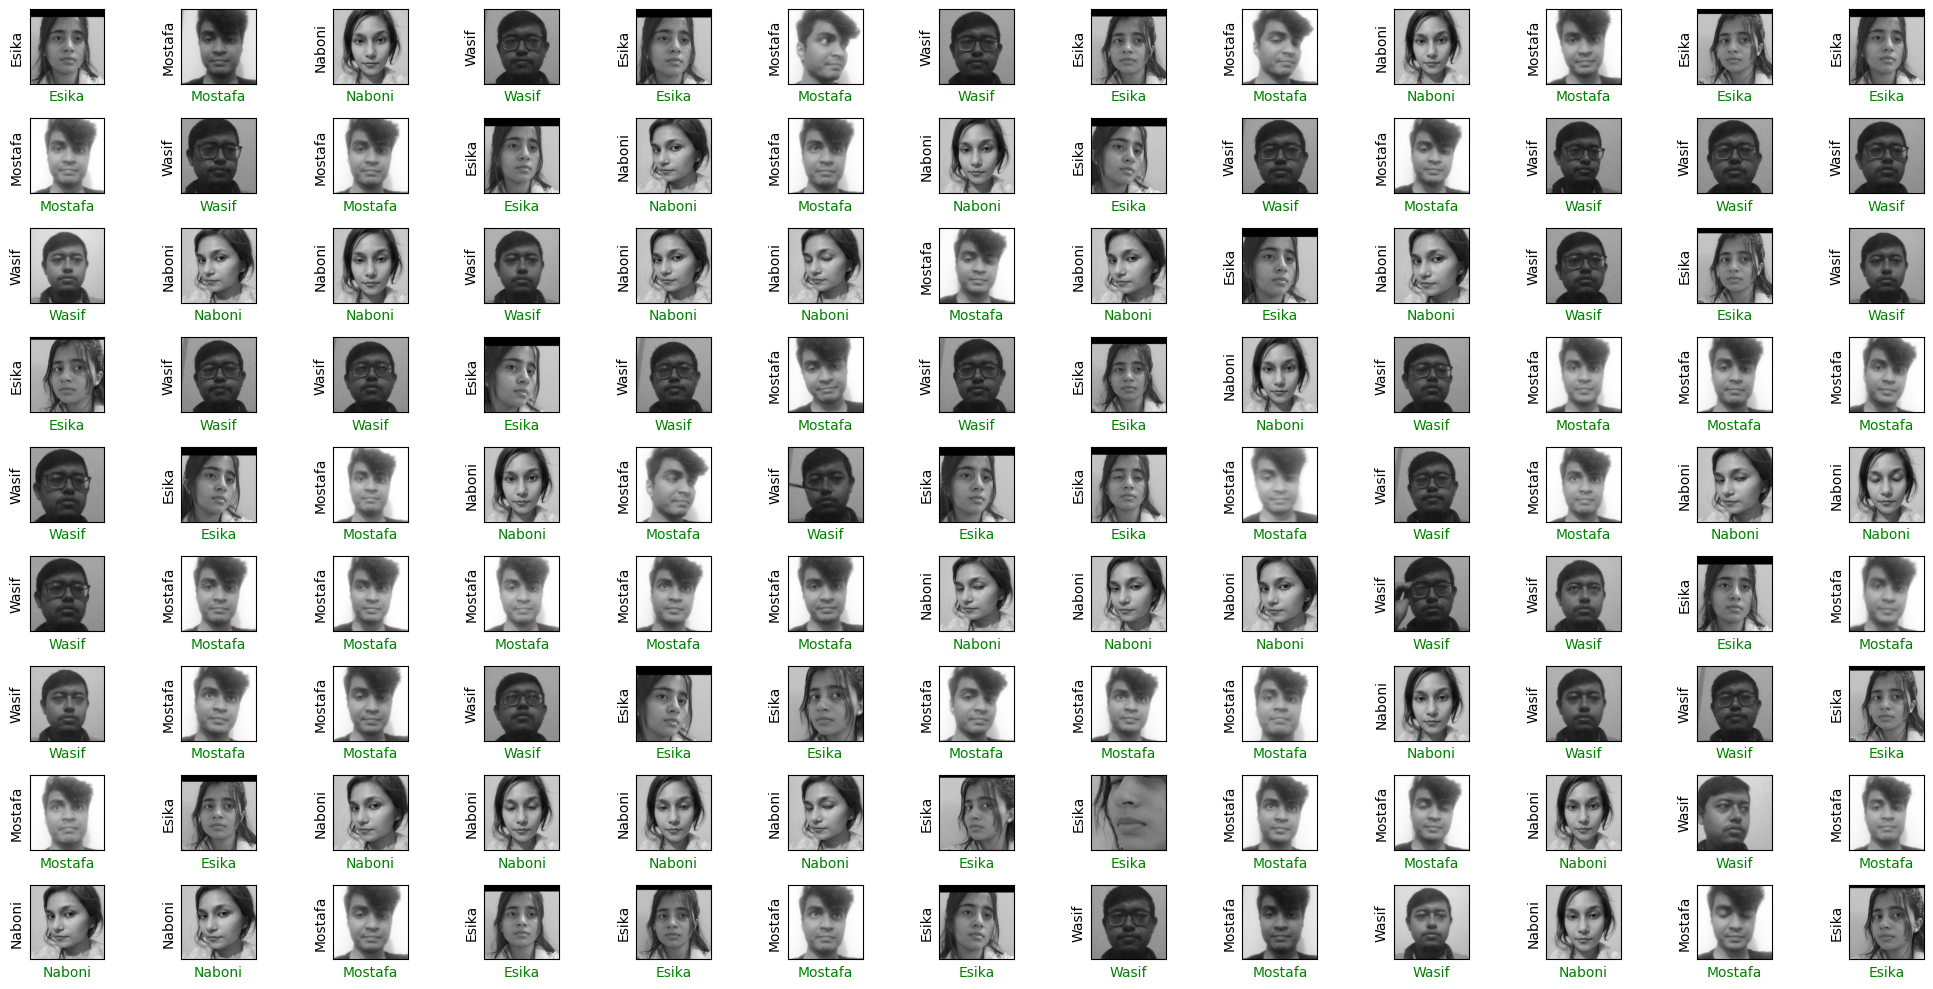

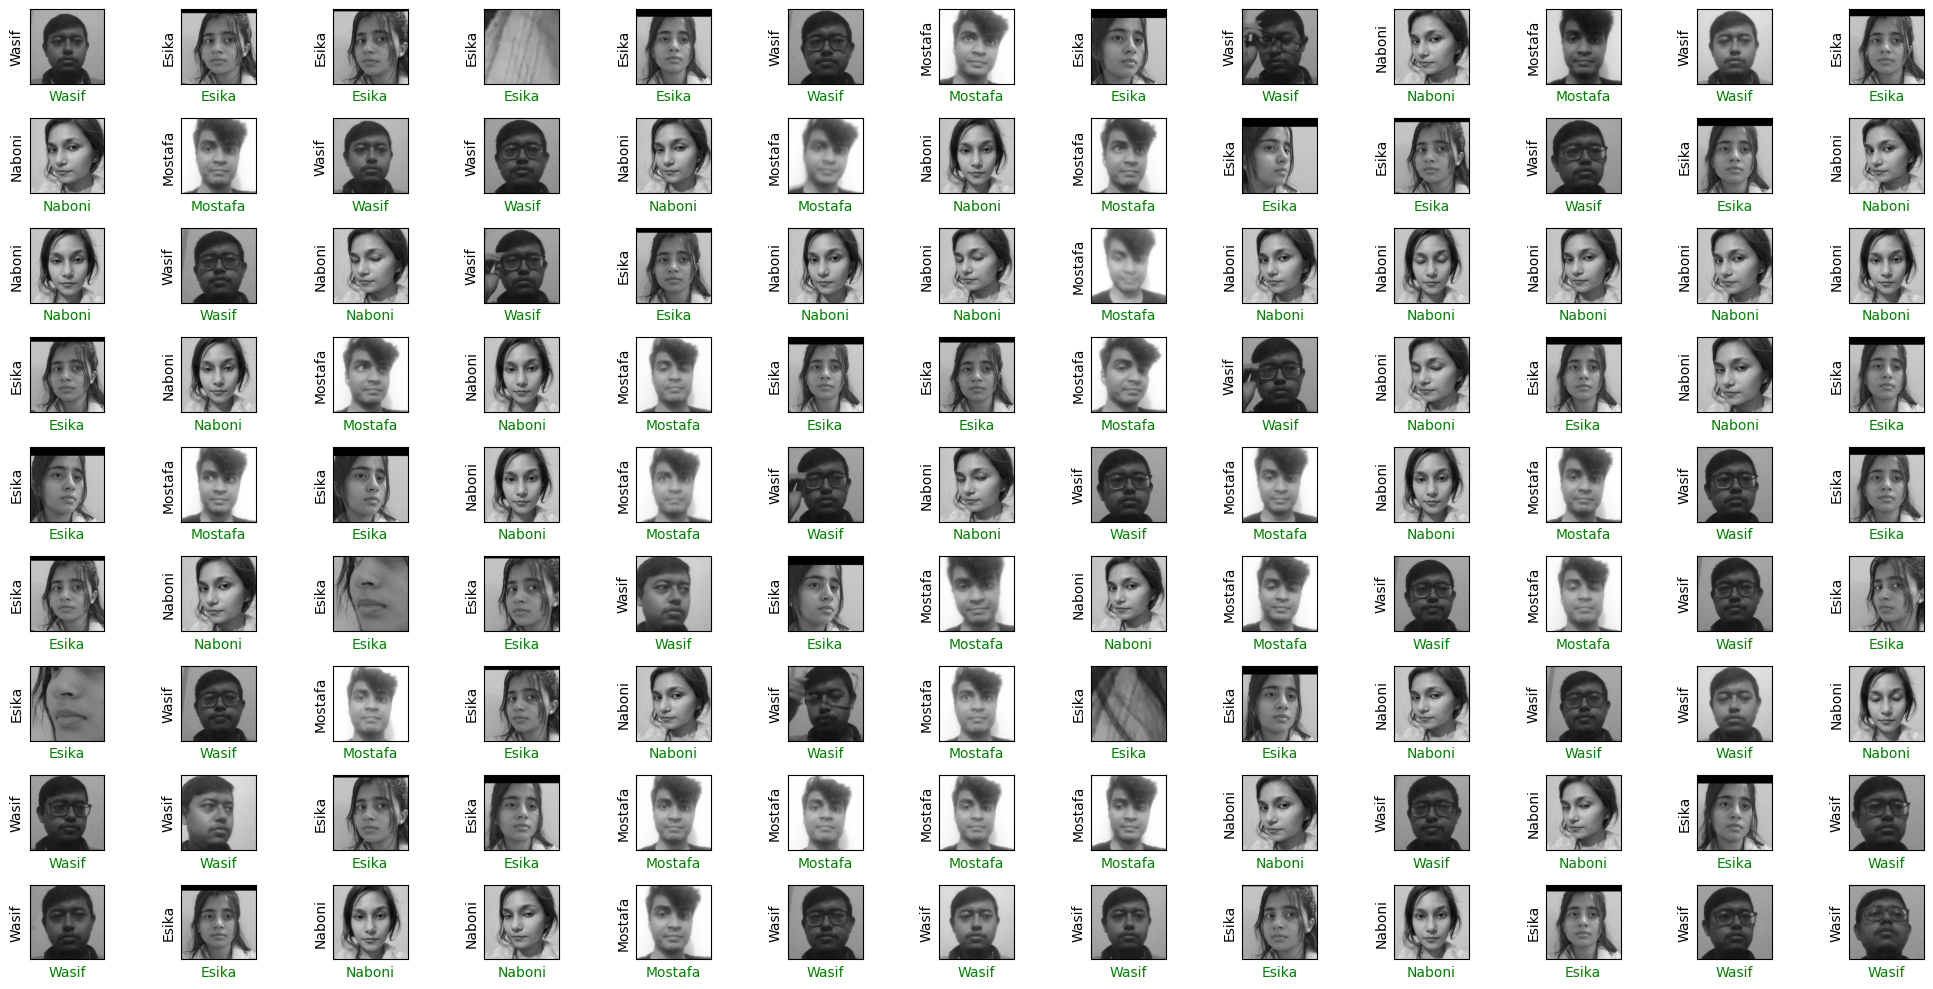

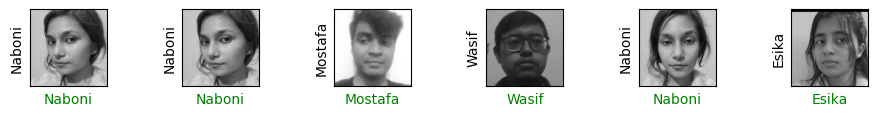

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_test, y_test, predictions, and categories are already defined

# Configuration
max_per_plot = 117  # Maximum number of subplots in one figure (9x13 grid)
num_plots = (len(X_test) + max_per_plot - 1) // max_per_plot  # Total number of figures needed

# Loop through batches of images
for plot_idx in range(num_plots):
    plt.figure(figsize=(20, 10))  # Create a new figure
    start = plot_idx * max_per_plot  # Start index for this batch
    end = min((plot_idx + 1) * max_per_plot, len(X_test))  # End index for this batch

    for i, idx in enumerate(range(start, end)):
        plt.subplot(9, 13, i + 1)  # Create subplot
        plt.imshow(X_test[idx].astype(np.uint8))  # Display image
        plt.xticks([])  # Remove x-axis ticks
        plt.yticks([])  # Remove y-axis ticks
        plt.ylabel(categories[y_test[idx]])  # Display true label

        # Display predicted label with color coding
        if y_test[idx] == np.argmax(predictions[idx]):
            plt.xlabel(categories[np.argmax(predictions[idx])], color='g')  # Green for correct prediction
        else:
            plt.xlabel(categories[np.argmax(predictions[idx])], color='r')  # Red for incorrect prediction

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the figure
